# Projeto de Reconhecimento facial simples

* Importando biblotecas necessárias

In [43]:
# Biblioteca para reconhecimento facial
import cv2
# Biblioteca para impressão das imagens
from matplotlib import pyplot as plt
%matplotlib inline

* Carregando imagem


In [113]:
# Função para carregar a imagem 
def ler_imagem(carregar_imagem):
    imagem = cv2.imread(carregar_imagem) # Carregando a imagem
    if imagem is not None:
        print('\nImagem Original Carregada\n')
        imagem = cv2.cvtColor(imagem, cv2.COLOR_BGR2RGB) # Convertendo de BGR para RBG
        plt.figure(figsize=(5, 4)) # Definindo o tamanho da imagem
        plt.title("Imagem Original")
        plt.imshow(imagem)
        plt.show()
    else:
        print('\nImagem não carregada')

* Separando as cores RGB da imagem

In [104]:
#Função que separa as cores RGB da imagem
def separa_cores(imagem_sep_cor):
    try:
        imagem_rgb = cv2.imread(imagem_sep_cor, cv2.IMREAD_COLOR) # Carregando a imagem
        if imagem_rgb is None:
            print("Erro no carregamento da imagem.")
            return
        # Separando as cores Vermelho, Verde e Azul - Padrão OpenCv (b, g, r)
        b, g, r = cv2.split(imagem_rgb)
        # Printando os gráficos
        print('\nSeparação das cores RGB da Imagem\n')
        plt.figure(figsize=[20,5]) # Definindo o tamanho de cada gráfico
        plt.subplot(141);plt.imshow(r, cmap='gray');plt.title("Camada vermelha (Tons de Cinza)"); # 1º gráfico
        plt.subplot(142);plt.imshow(g, cmap='gray');plt.title("Camada verde (Tons de Cinza)"); # 2º gráfico
        plt.subplot(143);plt.imshow(b, cmap='gray');plt.title("Camada azul (Tons de Cinza)"); # 3º gráfico
        # Unindo as camadas de cores
        camadas = cv2.merge((b, g, r))
        # Printando o gráfico com a junção das camadas de cores
        plt.subplot(144);plt.imshow(camadas[:,:,::-1]);plt.title("Junção das Camadas");# OBS: [:, :, ::-1] Converte de BGR para RBG
        plt.show()
    except Exception as e:
        print(f'Falha no processo de separação de cores: {e}')

* Conversão para tons de cinza e Exibição da imagem 

In [107]:
def escala_cinza(img_cinza):
    try:
        imagem_cinza = cv2.imread(img_cinza, cv2.IMREAD_GRAYSCALE) # Variável para conversão da imagem em tons de cinza
        if imagem_cinza is not None:
            print('\nImagem convertida com sucesso. Shape da imagem:', imagem_cinza.shape, end='\n\n') # Verificando a forma da imagem
            plt.title('Imagem Convertida em Tons de Cinza')
            plt.imshow(imagem_cinza,cmap='gray')
            plt.show()
        else:
            print('Imagem não carregada ou convertida')
    except Exception as e:
        print(f'Erro ao converter imagem para tons de cinza: {e}')

* Processo de reconhecimento facial

In [ ]:
classificador_face = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml')
imagem_face = imagem_cinza.copy()
faces = classificador_face.detectMultiScale(imagem_face, scaleFactor=1.3, minNeighbors=5)
if len(faces) == 0:
    print('Nenhum rosto encontrado')
else:
    print(f'Rosto(s) encontrado(s): {len(faces)}')

In [ ]:
for (x, y, w, h) in faces:
    cv2.rectangle(imagem_face, (x,y), (x+w, y+h), (255, 0, 255), 20)
if imagem_face is not None:
    plt.title('Reconhecimento Facial na Imagem')
    plt.imshow(imagem_face)
else:
    print('Erro ao carregar a imagem')

* Reconhecimento de olhos na imagem

In [ ]:
# Classificador de olhos
classifica_olhos = cv2.CascadeClassifier(cv2.data.haarcascades +"haarcascade_eye_tree_eyeglasses.xml")
imagem_olhos = imagem_cinza.copy()

In [ ]:
olhos = classifica_olhos.detectMultiScale(imagem_olhos, scaleFactor=1.1, minNeighbors=5, minSize=(30,30))
if len(olhos) == 0:
    print('Não foram localizados olhos na imagem')
else:
    print(f'Foram localizados {len(olhos)} olhos na imagem')

In [ ]:
for (x, y, w, h) in olhos:
    cv2.rectangle(imagem_olhos, (x,y), (x+w, y+h), (255, 0, 255), 20)
if imagem_olhos is not None:
    plt.title('Reconhecimento dos Olhos na Imagem')
    plt.imshow(imagem_olhos)
else:
    print('Erro ao carregar a imagem')

In [109]:
img1 = 'RostoMulher.jpg'


Imagem Original Carregada



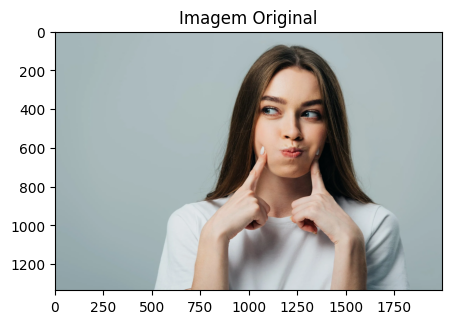


Separação das cores RGB da Imagem



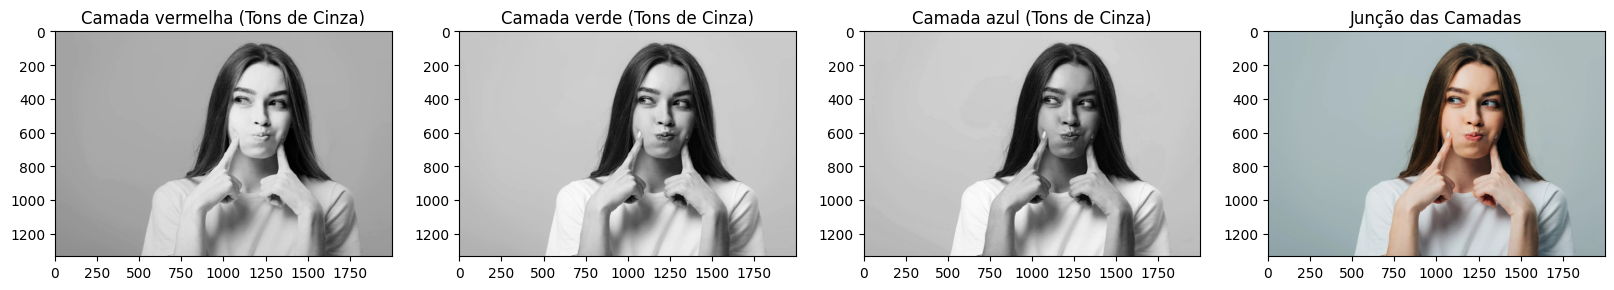


Imagem convertida com sucesso. Shape da imagem: (1335, 2000)



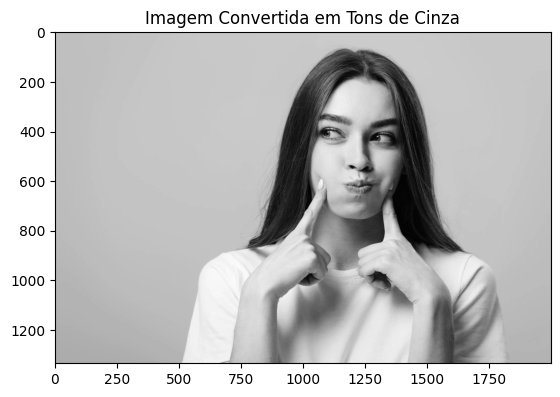

In [116]:
ler_imagem(img1)
separa_cores(img1)
escala_cinza(img1)